### <center>Classificação Multiclasse Fridge</center>

In [1]:
#Bibliotecas
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn 
import imblearn
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, precision_recall_fscore_support, roc_auc_score

In [3]:
#Ignorando avisos
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Formatação
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold= 15)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

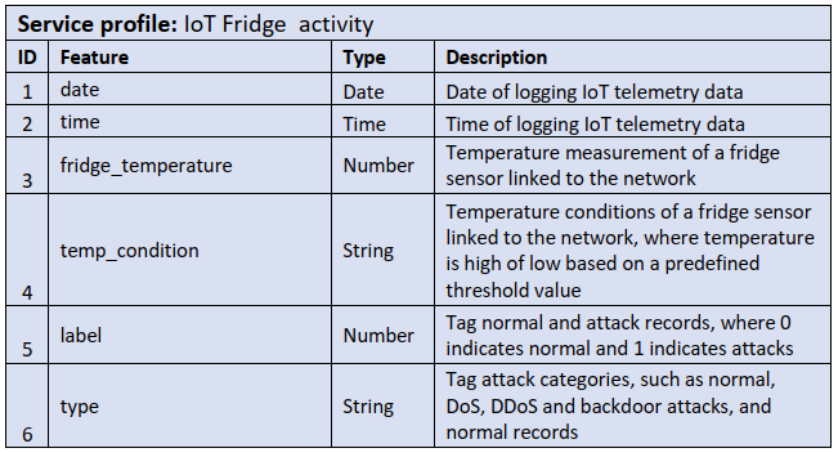

In [5]:
Train_Test_IoT_Fridge = pd.read_csv('../datasets/Train_Test_IoT_dataset/Train_Test_IoT_Fridge.csv')
Train_Test_IoT_Fridge

,ts,date,time,fridge_temperature,temp_condition,label,type
0,1556245180,25-Apr-19,19:19:40,9.00,high,1,ddos
1,1556245180,25-Apr-19,19:19:40,9.25,high,1,ddos
2,1556245185,25-Apr-19,19:19:45,12.65,high,1,ddos
3,1556245185,25-Apr-19,19:19:45,4.65,low,1,ddos
4,1556245195,25-Apr-19,19:19:55,12.65,high,1,ddos
...,...,...,...,...,...,...,...
59939,1554203235,2-Apr-19,04:07:15,7.65,high,0,normal
59940,1554203235,2-Apr-19,04:07:15,13.85,high,0,normal
59941,1554203235,2-Apr-19,04:07:15,5.40,low,0,normal
59942,1554203235,2-Apr-19,04:07:15,2.90,low,0,normal


In [6]:
Train_Test_IoT_Fridge.temp_condition[Train_Test_IoT_Fridge.temp_condition == 'high'] = 'high'
Train_Test_IoT_Fridge.temp_condition[Train_Test_IoT_Fridge.temp_condition == 'high '] = 'high'
Train_Test_IoT_Fridge.temp_condition[Train_Test_IoT_Fridge.temp_condition == 'high  '] = 'high'
Train_Test_IoT_Fridge.temp_condition[Train_Test_IoT_Fridge.temp_condition == 'low'] = 'low'
Train_Test_IoT_Fridge.temp_condition[Train_Test_IoT_Fridge.temp_condition == 'low '] = 'low'
Train_Test_IoT_Fridge.temp_condition[Train_Test_IoT_Fridge.temp_condition == 'low  '] = 'low'

In [7]:
Train_Test_IoT_Fridge

,ts,date,time,fridge_temperature,temp_condition,label,type
0,1556245180,25-Apr-19,19:19:40,9.00,high,1,ddos
1,1556245180,25-Apr-19,19:19:40,9.25,high,1,ddos
2,1556245185,25-Apr-19,19:19:45,12.65,high,1,ddos
3,1556245185,25-Apr-19,19:19:45,4.65,low,1,ddos
4,1556245195,25-Apr-19,19:19:55,12.65,high,1,ddos
...,...,...,...,...,...,...,...
59939,1554203235,2-Apr-19,04:07:15,7.65,high,0,normal
59940,1554203235,2-Apr-19,04:07:15,13.85,high,0,normal
59941,1554203235,2-Apr-19,04:07:15,5.40,low,0,normal
59942,1554203235,2-Apr-19,04:07:15,2.90,low,0,normal


In [8]:
Train_Test_IoT_Fridge['temp_condition'].unique()

array(['high', 'low'], dtype=object)

In [9]:
Train_Test_IoT_Fridge['type'].value_counts()

normal        35000
ddos           5000
backdoor       5000
injection      5000
password       5000
ransomware     2902
xss            2042
Name: type, dtype: int64

In [10]:
Train_Test_IoT_Fridge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59944 entries, 0 to 59943
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ts                  59944 non-null  int64  
 1   date                59944 non-null  object 
 2   time                59944 non-null  object 
 3   fridge_temperature  59944 non-null  float64
 4   temp_condition      59944 non-null  object 
 5   label               59944 non-null  int64  
 6   type                59944 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 3.2+ MB


In [11]:
Train_Test_IoT_Fridge.head(3)

,ts,date,time,fridge_temperature,temp_condition,label,type
0,1556245180,25-Apr-19,19:19:40,9.00,high,1,ddos
1,1556245180,25-Apr-19,19:19:40,9.25,high,1,ddos
2,1556245185,25-Apr-19,19:19:45,12.65,high,1,ddos


In [12]:
Train_Test_IoT_Fridge['temp_condition'].unique()

array(['high', 'low'], dtype=object)

## Processamento dos Dados
#### Dimensionamento (StandardScaler / Padronização)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
# Criando outras features usando a hora (hour-minute-second)
Train_Test_IoT_Fridge[['hour', 'minute', 'second']] = Train_Test_IoT_Fridge['time'].str.split(':', expand=True)
Train_Test_IoT_Fridge['hour'] = Train_Test_IoT_Fridge['hour'].astype(int)
Train_Test_IoT_Fridge['minute'] = Train_Test_IoT_Fridge['minute'].astype(int)
Train_Test_IoT_Fridge['second'] = Train_Test_IoT_Fridge['second'].astype(int)

# Criando outras features usando a data (day-month-year)
Train_Test_IoT_Fridge.date = pd.to_datetime(Train_Test_IoT_Fridge.date)
Train_Test_IoT_Fridge['day'] = Train_Test_IoT_Fridge.date.dt.day

# Removendo features
Train_Test_IoT_Fridge.drop(['ts', 'date', 'time', 'label'], axis=1, inplace=True)
Train_Test_IoT_Fridge.head()

,fridge_temperature,temp_condition,type,hour,minute,second,day
0,9.00,high,ddos,19,19,40,25
1,9.25,high,ddos,19,19,40,25
2,12.65,high,ddos,19,19,45,25
3,4.65,low,ddos,19,19,45,25
4,12.65,high,ddos,19,19,55,25


In [15]:
# separação de features e label
y_data = Train_Test_IoT_Fridge.type
X_data = Train_Test_IoT_Fridge.drop('type', axis=1)

In [16]:
X_data.head()

,fridge_temperature,temp_condition,hour,minute,second,day
0,9.00,high,19,19,40,25
1,9.25,high,19,19,40,25
2,12.65,high,19,19,45,25
3,4.65,low,19,19,45,25
4,12.65,high,19,19,55,25


In [17]:
y_data.head()

0    ddos
1    ddos
2    ddos
3    ddos
4    ddos
Name: type, dtype: object

In [18]:
labels = list(y_data.unique())

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

categorical_features = ['temp_condition']
# o ColumnTransformer é uma forma interessante de lidar com dados de uma determinada columna
# aqui eu lido com os categoricos e o restante eu passo direto 'passthrough'
cat_handle = ColumnTransformer(
                    transformers=[
                        ('cat', OrdinalEncoder(), categorical_features),
                         ], remainder='passthrough')

# aqui vc junta tudo, lidar com os dados categoricos e em seguida faz o standardscaler
preprocessor = Pipeline(steps=[
    ('categorical', cat_handle), 
    ('numerical', StandardScaler())
])

In [20]:
X_data.head()

,fridge_temperature,temp_condition,hour,minute,second,day
0,9.00,high,19,19,40,25
1,9.25,high,19,19,40,25
2,12.65,high,19,19,45,25
3,4.65,low,19,19,45,25
4,12.65,high,19,19,55,25


## Divisão dos dados

Esse código está usando o objeto StratifiedShuffleSplit da biblioteca sklearn.model_selection para dividir um conjunto de dados em conjuntos de treino e teste. A divisão é feita de forma estratificada, ou seja, preservando a proporção de cada classe do conjunto de dados original nos conjuntos de treino e teste.

A classe StratifiedShuffleSplit é uma estratégia de validação cruzada que, ao contrário da validação cruzada tradicional, não faz uma partição fixa do conjunto de dados em k conjuntos. Em vez disso, ela faz várias partições aleatórias do conjunto de dados e, em cada uma delas, mantém a proporção de cada classe nos conjuntos de treino e teste. Essa abordagem é útil quando o conjunto de dados é desbalanceado, ou seja, quando algumas classes têm muito mais instâncias do que outras.

O objeto StratifiedShuffleSplit é inicializado com três parâmetros:

* `n_splits`: número de partições a serem geradas. Neste caso, é gerada apenas uma partição.
* `test_size`: proporção do conjunto de dados a ser usada como teste. Neste caso, usamos uma proporção de 0.3, o que significa que 30% das instâncias são usadas como teste.
*`random_state`: semente para o gerador de números aleatórios. Neste caso, é usada a semente 0.

O loop for é usado para iterar sobre a única partição gerada pelo objeto StratifiedShuffleSplit. Em cada iteração, ele recebe os índices das instâncias que serão usadas como treino e teste e cria dois novos conjuntos de dados (*X_train, y_train* e *X_test, y_test*) com essas instâncias. Esses conjuntos de dados são usados posteriormente para treinar e testar um modelo de aprendizado de máquina.

**Em resumo, esse código é uma forma de dividir um conjunto de dados em conjuntos de treino e teste de forma estratificada, o que pode ser útil quando o conjunto de dados é desbalanceado.**

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    shuffle=True, 
                                                    random_state=42, 
                                                    stratify=y_data)

# Reparar que está sendo usado o X_data e y_data sem passar o transform neles ainda.

In [22]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

## PipeLine Regressão Logística

Foi adicionado algumas configurações no modelo de Regressão Logística, como max_iter, solver, C, e penalty. Além disso, o GridSearchCV é utilizado para ajustar nossos parâmetros em uma grade de valores e encontrar a melhor combinação.

Existem alguns parâmetros que você pode ajustar para uma regressão logística no scikit-learn. Aqui estão alguns exemplos:

* **`penalty`**: Especifica a norma a ser usada na regularização. Pode ser 'L1', 'L2', 'elasticnet' ou 'none'.


* **`C`**: Parâmetro de inversão de regularização. Valores menores especificam uma regularização mais forte.


* **`solver`**: Algoritmo a ser usado no problema de otimização. Pode ser 'newton-cg', 'lbfgs', 'liblinear', 'sag' ou 'saga'.


* **`max_iter`**: Número máximo de iterações para o solucionador convergir.


* **`multi_class`**: Especifica o esquema de classificação multiclasse. Pode ser 'ovr' (one-vs-rest) ou 'multinomial'.


* **`class_weight`**: Peso atribuído a cada classe. Pode ser 'balanced' ou um dicionário com pesos personalizados.

In [23]:
from sklearn.feature_selection import SelectFromModel

# repare que eu jogue tudo na variavel 'pipeline', ela tem a etapa de preprocesamento e o seu modelo
# por isso fica mais facil utilizar as funções Pipeline no sklearn. 
# fica bem mais simples, coloquei o feature selection tbm.
pipeline = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', LogisticRegression())
])

param_grid_LR = {
                'feature_selection__max_features': [1,2,3],
                'classificador__penalty': ['l1', 'l2'],
                'classificador__C': [0.1, 1.0, 10.0],
                'classificador__solver': ['newton-cg', 'saga'],
                'classificador__max_iter': [100, 1000],
                'classificador__multi_class': ['ovr', 'multinomial'],
                'classificador__class_weight': ['balanced']}

# Repare que o param_grid é passado o nome do classifier dois underscore 
# antes do parametro assim: nomeclassificador__parametro. O nome é passado na string do pipeline
# no caso deixei 'classificador' mesmo.
grid_search = GridSearchCV(pipeline, param_grid=param_grid_LR, cv=5, n_jobs=-1, refit=True)

A função GridSearchCV da biblioteca sklearn.model_selection possui diversos parâmetros que podem ser utilizados para controlar o processo de busca de hiperparâmetros e a validação cruzada. Abaixo estão listados os principais parâmetros:

* **`estimator`**: representa o modelo a ser otimizado e deve ser uma instância de um estimador do scikit-learn.


* **`param_grid`**: um dicionário que mapeia nomes de parâmetros do modelo para listas de valores a serem explorados durante a busca de hiperparâmetros.


* **`scoring`**: uma métrica de avaliação que será utilizada para avaliar o desempenho do modelo. Deve ser uma string que representa o nome da métrica ou uma função que calcula a métrica. Por padrão, é utilizado o score da função score() do estimador.


* **`cv`**: número de partições a serem utilizadas na validação cruzada.


* **`n_jobs`**: número de trabalhos em paralelo a serem executados. Se n_jobs=-1, todos os processadores disponíveis serão utilizados.


* **`verbose`**: nível de verbosidade do output.


* **`pre_dispatch`**: número de trabalhos que devem ser despachados para o trabalhador antes que o próximo lote de tarefas seja despachado. O valor padrão é 2 * n_jobs.


* **`return_train_score`**: se True, inclui o score de treino para cada combinação de parâmetros no resultado. O valor padrão é False.


* **`refit`**: se True, refita o modelo com os melhores parâmetros encontrados usando todos os dados disponíveis. O valor padrão é True.


* `iid`: se True, assume que as dobras de validação cruzada são independentes e identicamente distribuídas (i.i.d.), o que não é garantido para todos os tipos de dados. O valor padrão é True.


* `error_score`: valor a ser atribuído ao score caso ocorra algum erro na validação cruzada.


* `return_estimator`: se True, retorna os estimadores que foram ajustados para cada combinação de parâmetros. O valor padrão é False.

In [24]:
# fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessamento',
                                        Pipeline(steps=[('categorical',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('cat',
                                                                                          OrdinalEncoder(),
                                                                                          ['temp_condition'])])),
                                                        ('numerical',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier(),
                                                        max_features=3)),
                                       ('classificador',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'classificador__C': [0.1, 1.0, 10.0],
                         'classificador__class_weight': ['balanced'],
                         'classificador__max_iter': [100, 1000],
                         'classificador__multi_class': ['ovr', 'multinomial'],
                         'classificador__penalty': ['l1', 'l2'],
                         'classificador__solver': ['newton-cg', 'saga'],
                         'feature_selection__max_features': [1, 2, 3]})

In [25]:
X_train.head(3)

,fridge_temperature,temp_condition,hour,minute,second,day
8635,9.95,high,12,40,1,31
24870,10.65,high,4,1,33,2
24563,5.95,low,4,1,26,2


In [26]:
# mostra os paramentros
print(grid_search.best_params_)

{'classificador__C': 0.1, 'classificador__class_weight': 'balanced', 'classificador__max_iter': 100, 'classificador__multi_class': 'multinomial', 'classificador__penalty': 'l1', 'classificador__solver': 'saga', 'feature_selection__max_features': 1}


In [27]:
# essas metricas são do conjunto de validação é pra ver como o modelo se comportou, 
# o std_score é o desvio padrão, ele tem que ser baixo.
# vc não precisa mostrar metrica de valição ou treino. o que importa é a metrica no TESTE.
# o gridsearch faz a validação cruzado k-fold, o cv=5 são 5 folds.
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

Validation score: 0.46201 +- 0.00599


In [28]:
# aqui eu faço a predição.  EU NÃO DEI O FIT NOVAMENTE
# olha lá em cima como eu passei o gridsearch, tem um paramentro chamado refit, quando eles está true 
# quer dizer que o modelo JÁ É treinado com os melhores parametros, por isso já dou um predict direto

y_pred = grid_search.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
# classification report. Apenas do test
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.04      0.17      0.06      1250
           1       0.50      1.00      0.67      1250
           2       0.00      0.00      0.00      1250
           3       1.00      0.34      0.51      8750
           4       1.00      1.00      1.00      1250
           5       0.41      1.00      0.58       726
           6       1.00      1.00      1.00       510

    accuracy                           0.46     14986
   macro avg       0.56      0.64      0.55     14986
weighted avg       0.77      0.46      0.50     14986



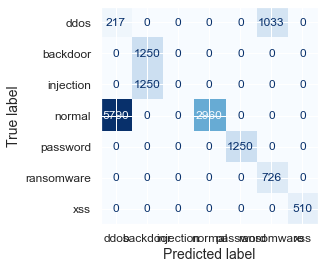

In [30]:
# matrix de confusão. Apenas do teste
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=labels, 
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()

## KNeighborsClassifier

Existem vários parâmetros que podem ser ajustados para o modelo KNN usando a busca em grade (GridSearchCV). Esses são alguns dos principais parâmetros que podem ser incluídos no dicionário param_grid:

* **`n_neighbors`**: número de vizinhos mais próximos a serem considerados. É um parâmetro obrigatório do modelo KNN. 


* **`weights`**: método de ponderação dos vizinhos próximos. Os valores possíveis são "uniform" (ponderação uniforme) ou "distance" (ponderação pela inversa da distância).


* **`algorithm`**: algoritmo a ser usado para encontrar os vizinhos próximos. Os valores possíveis são "auto" (o algoritmo escolhe o mais apropriado com base nos dados), "ball_tree" (utiliza uma estrutura de dados de árvore para acelerar a busca) ou "kd_tree" (utiliza uma estrutura de dados de árvore k-dimensionais para acelerar a busca).


* **`leaf_size`**: tamanho da folha a ser usado na estrutura de dados da árvore. Isso afeta a velocidade e a memória necessárias para construir a árvore.


* **`p`**: parâmetro de potência a ser usado na métrica de distância de Minkowski. Se p=1, a distância de Manhattan é usada. Se p=2, a distância euclidiana é usada.


* **`metric`**: métrica de distância a ser usada para medir a distância entre os pontos. Os valores possíveis são "euclidean", "manhattan", "chebyshev", "minkowski" (usado com o parâmetro p) e outras métricas personalizadas.

In [31]:
from sklearn.feature_selection import SelectFromModel

pipeline_knn = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', KNeighborsClassifier())
])

param_grid_KNN = {
                'feature_selection__max_features': [1,2,3],
                'classificador__n_neighbors': [1, 3, 5, 7, 9],
                'classificador__metric': ['euclidean', 'manhatan', 'chebyshev', 'minkowski']}

grid_search = GridSearchCV(pipeline_knn, param_grid=param_grid_KNN, cv=5, n_jobs=-1, refit=True)

In [32]:
# fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessamento',
                                        Pipeline(steps=[('categorical',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('cat',
                                                                                          OrdinalEncoder(),
                                                                                          ['temp_condition'])])),
                                                        ('numerical',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier(),
                                                        max_features=3)),
                                       ('classificador',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classificador__metric': ['euclidean', 'manhatan',
                                                   'chebyshev', 'minkowski'],
                         'classificador__n_neighbors': [1, 3, 5, 7, 9],
                         'feature_selection__max_features': [1, 2, 3]})

In [33]:
X_train.head(3)

,fridge_temperature,temp_condition,hour,minute,second,day
8635,9.95,high,12,40,1,31
24870,10.65,high,4,1,33,2
24563,5.95,low,4,1,26,2


In [34]:
# Exibindo os melhores parâmetros
print(grid_search.best_params_)

{'classificador__metric': 'euclidean', 'classificador__n_neighbors': 1, 'feature_selection__max_features': 2}


In [35]:
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

Validation score: 1.00000 +- 0.00000


In [36]:
y_pred = grid_search.predict(X_test)

In [37]:
# Classification Report (Apenas dos dados de teste)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1250
           1       1.00      1.00      1.00      1250
           2       1.00      1.00      1.00      1250
           3       1.00      1.00      1.00      8750
           4       1.00      1.00      1.00      1250
           5       1.00      1.00      1.00       726
           6       1.00      1.00      1.00       510

    accuracy                           1.00     14986
   macro avg       1.00      1.00      1.00     14986
weighted avg       1.00      1.00      1.00     14986



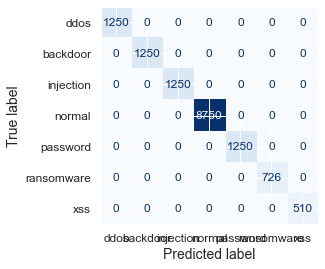

In [38]:
# Matrix de Confusão (Apenas do teste)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=labels, 
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()

## PipeLine Gradient Boosting Master

* **`learning_rate`**: taxa de aprendizado do algoritmo.


* **`n_estimators`**: número de estimadores no algoritmo.


* **`max_depth`**: profundidade máxima das árvores de decisão.


* **`min_samples_split`**: número mínimo de amostras necessárias para dividir um nó interno.


* **`min_samples_leaf`**: número mínimo de amostras necessárias em uma folha.


* **`max_features`**: número máximo de recursos considerados para dividir um nó.


* **`subsample`**: fração de amostras usadas para treinar cada árvore.

In [39]:
pipeline_gbm = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', GradientBoostingClassifier())
])

In [40]:
param_grid_GBM = {
    'feature_selection__max_features': [1,2,3],
    'classificador__learning_rate': [0.1, 0.05],
    'classificador__n_estimators': [50, 100],
    'classificador__max_depth': [2, 3],
    'classificador__min_samples_split': [2, 4],
    'classificador__min_samples_leaf': [1, 2],
    'classificador__max_features': ['auto', 'sqrt'],
    'classificador__subsample': [0.8, 1.0]}

grid_search = GridSearchCV(pipeline_gbm, param_grid=param_grid_GBM, cv=5, n_jobs=-1, refit=True)

In [41]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessamento',
                                        Pipeline(steps=[('categorical',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('cat',
                                                                                          OrdinalEncoder(),
                                                                                          ['temp_condition'])])),
                                                        ('numerical',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier(),
                                                        max_features=3)),
                                       ('classificador',
                                        GradientBoos...r())]),
             n_jobs=-1,
             param_grid={'classificador__learning_rate': [0.1, 0.05],
                         'classificador__max_depth': [2, 3],
                         'classificador__max_features': ['auto', 'sqrt'],
                         'classificador__min_samples_leaf': [1, 2],
                         'classificador__min_samples_split': [2, 4],
                         'classificador__n_estimators': [50, 100],
                         'classificador__subsample': [0.8, 1.0],
                         'feature_selection__max_features': [1, 2, 3]})

In [42]:
# Exibindo os melhores parâmetros
print(grid_search.best_params_)

{'classificador__learning_rate': 0.1, 'classificador__max_depth': 2, 'classificador__max_features': 'auto', 'classificador__min_samples_leaf': 1, 'classificador__min_samples_split': 2, 'classificador__n_estimators': 50, 'classificador__subsample': 0.8, 'feature_selection__max_features': 2}


In [43]:
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

Validation score: 1.00000 +- 0.00000


In [44]:
y_pred = grid_search.predict(X_test)

In [45]:
# Classification Report (Apenas dos dados de teste)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1250
           1       1.00      1.00      1.00      1250
           2       1.00      1.00      1.00      1250
           3       1.00      1.00      1.00      8750
           4       1.00      1.00      1.00      1250
           5       1.00      1.00      1.00       726
           6       1.00      1.00      1.00       510

    accuracy                           1.00     14986
   macro avg       1.00      1.00      1.00     14986
weighted avg       1.00      1.00      1.00     14986



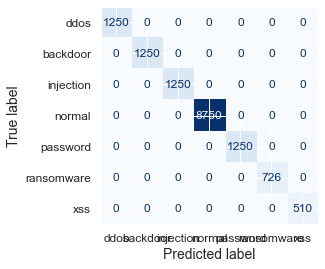

In [46]:
# Matrix de Confusão (Apenas do teste)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=labels, 
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()

## PipeLine Nayve Bayes BernoulliNB

A função BernoulliNB() tem apenas um hiperparâmetro para ajuste:

* `alpha`: parâmetro de suavização Laplace. Quanto maior o valor de alpha, maior é a suavização aplicada.

In [47]:
pipeline_nb = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', BernoulliNB())
])

param_grid_NB = {
    'feature_selection__max_features': [1,2,3],
    'classificador__alpha': [0.1, 0.5, 1.0]}

grid_search = GridSearchCV(pipeline_nb, param_grid=param_grid_NB, cv=5, n_jobs=-1, refit=True)

In [48]:
# fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessamento',
                                        Pipeline(steps=[('categorical',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('cat',
                                                                                          OrdinalEncoder(),
                                                                                          ['temp_condition'])])),
                                                        ('numerical',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier(),
                                                        max_features=3)),
                                       ('classificador', BernoulliNB())]),
             n_jobs=-1,
             param_grid={'classificador__alpha': [0.1, 0.5, 1.0],
                         'feature_selection__max_features': [1, 2, 3]})

In [49]:
# Exibindo os melhores parâmetros
print(grid_search.best_params_)

{'classificador__alpha': 0.1, 'feature_selection__max_features': 1}


In [50]:
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

Validation score: 0.58388 +- 0.00003


In [51]:
y_pred = grid_search.predict(X_test)

In [52]:
# Classification Report (Apenas dos dados de teste)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1250
           1       0.00      0.00      0.00      1250
           2       0.00      0.00      0.00      1250
           3       0.58      1.00      0.74      8750
           4       0.00      0.00      0.00      1250
           5       0.00      0.00      0.00       726
           6       0.00      0.00      0.00       510

    accuracy                           0.58     14986
   macro avg       0.08      0.14      0.11     14986
weighted avg       0.34      0.58      0.43     14986



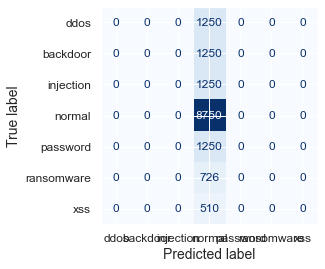

In [53]:
# Matrix de Confusão (Apenas do teste)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=labels, 
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()

## PipeLine Linear Discriminant Analysis

Aqui estão os principais parâmetros que podemos ajustar:

* **`solver`**: Algoritmo usado para encontrar a solução. Possíveis valores são svd, lsqr ou eigen.


* **`shrinkage`**: Parâmetro de encolhimento utilizado para melhorar a estabilidade da estimativa. Possíveis valores são None, auto ou um valor float entre 0 e 1.


* **`tol`**: Tolerância para a convergência do algoritmo. Padrão é 1e-4.


* **`n_components`**: Número de componentes para manter. O padrão é manter todas as componentes.


* **`priors`**: Probabilidades a priori de cada classe. Se None, as probabilidades são ajustadas de acordo com os dados.


* **`store_covariance`**: Se verdadeiro, armazena a matriz de covariância empírica de cada classe. Padrão é False.

In [54]:
pipeline_lda = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', LinearDiscriminantAnalysis())
])

param_grid_LDA = {
    'feature_selection__max_features': [1,2,3],
    'classificador__solver': ['svd', 'lsqr', 'eigen']}

grid_search = GridSearchCV(pipeline_lda, param_grid=param_grid_LDA, cv=5, n_jobs=-1, refit=True)

In [55]:
# fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessamento',
                                        Pipeline(steps=[('categorical',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('cat',
                                                                                          OrdinalEncoder(),
                                                                                          ['temp_condition'])])),
                                                        ('numerical',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier(),
                                                        max_features=3)),
                                       ('classificador',
                                        LinearDiscriminantAnalysis())]),
             n_jobs=-1,
             param_grid={'classificador__solver': ['svd', 'lsqr', 'eigen'],
                         'feature_selection__max_features': [1, 2, 3]})

In [56]:
# Exibindo os melhores parâmetros
print(grid_search.best_params_)

{'classificador__solver': 'svd', 'feature_selection__max_features': 2}


In [57]:
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

Validation score: 0.61662 +- 0.00481


In [58]:
y_pred = grid_search.predict(X_test)

In [59]:
# Classification Report (Apenas dos dados de teste)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1250
           1       0.32      0.42      0.36      1250
           2       0.00      0.00      0.00      1250
           3       0.66      0.95      0.78      8750
           4       0.00      0.00      0.00      1250
           5       0.65      0.60      0.62       726
           6       0.00      0.00      0.00       510

    accuracy                           0.62     14986
   macro avg       0.23      0.28      0.25     14986
weighted avg       0.44      0.62      0.51     14986



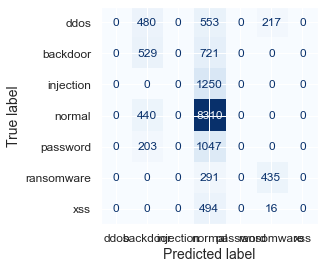

In [60]:
# Matrix de Confusão (Apenas do teste)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=labels, 
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()

## PipeLine DecisionTreeClassifier

Aqui estão alguns dos parâmetros mais comuns que podemos incluir no param_grid para o DecisionTreeClassifier:

* **`criterion`**: critério de divisão usado na árvore de decisão. As opções são gini ou entropy.


* **`max_depth`**: profundidade máxima da árvore de decisão. Um valor mais alto permitirá que a árvore de decisão tenha mais níveis, o que pode levar a uma melhor precisão, mas também pode levar a um maior risco de sobreajuste.


* **`min_samples_split`**: o número mínimo de amostras necessárias para dividir um nó. Isso ajuda a evitar divisões que levam a subárvores muito pequenas.


* **`min_samples_leaf`**: o número mínimo de amostras necessárias em uma folha. Isso ajuda a evitar folhas que contenham muito poucas amostras.


* **`max_features`**: o número máximo de recursos a serem considerados para cada divisão. Isso pode ajudar a reduzir o risco de sobreajuste.


* **`class_weight`**: pesos associados a cada classe. Isso pode ser útil para lidar com conjuntos de dados desbalanceados.

In [61]:
pipeline_dtc = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', DecisionTreeClassifier())
])

param_grid_DTC = {
    'feature_selection__max_features': [1,2,3],
    'classificador__criterion': ['gini', 'entropy'],
    'classificador__max_depth': [2, 4, 6],
    'classificador__min_samples_split': [2, 5, 10],
    'classificador__min_samples_leaf': [1, 2, 4],
    'classificador__max_features': ['sqrt', 'log2'],
    'classificador__class_weight': [None, 'balanced']}

grid_search = GridSearchCV(pipeline_dtc, param_grid=param_grid_DTC, cv=5, n_jobs=-1, refit=True)

In [62]:
# fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessamento',
                                        Pipeline(steps=[('categorical',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('cat',
                                                                                          OrdinalEncoder(),
                                                                                          ['temp_condition'])])),
                                                        ('numerical',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier(),
                                                        max_features=3)),
                                       ('classificador',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'classificador__class_weight': [None, 'balanced'],
                         'classificador__criterion': ['gini', 'entropy'],
                         'classificador__max_depth': [2, 4, 6],
                         'classificador__max_features': ['sqrt', 'log2'],
                         'classificador__min_samples_leaf': [1, 2, 4],
                         'classificador__min_samples_split': [2, 5, 10],
                         'feature_selection__max_features': [1, 2, 3]})

In [63]:
# Exibindo os melhores parâmetros
print(grid_search.best_params_)

{'classificador__class_weight': None, 'classificador__criterion': 'entropy', 'classificador__max_depth': 6, 'classificador__max_features': 'sqrt', 'classificador__min_samples_leaf': 1, 'classificador__min_samples_split': 5, 'feature_selection__max_features': 3}


In [64]:
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

Validation score: 1.00000 +- 0.00000


In [65]:
y_pred = grid_search.predict(X_test)

In [66]:
# Classification Report (Apenas dos dados de teste)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90      1250
           1       1.00      1.00      1.00      1250
           2       0.85      1.00      0.92      1250
           3       1.00      1.00      1.00      8750
           4       1.00      1.00      1.00      1250
           5       1.00      1.00      1.00       726
           6       1.00      1.00      1.00       510

    accuracy                           0.98     14986
   macro avg       0.98      0.97      0.97     14986
weighted avg       0.99      0.98      0.98     14986



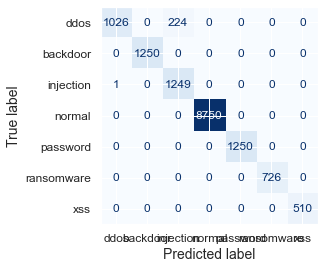

In [67]:
# Matrix de Confusão (Apenas do teste)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=labels, 
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()

## PipeLine RandomForestClassifier

Existem muitos parâmetros que podem ser ajustados em um modelo RandomForestClassifier(). Alguns dos principais parâmetros que podem ser ajustados e seus respectivos valores típicos são:

* **`n_estimators`**: o número de árvores na floresta. Quanto maior, melhor a performance do modelo, mas também maior o tempo de treinamento e predição. Valores típicos estão entre 100 e 1000.


* **`max_depth`**: a profundidade máxima de cada árvore na floresta. Quanto mais profunda, mais complexo o modelo pode ser, mas também mais propenso a overfitting. Valores típicos estão entre 3 e 10.


* **`min_samples_split`**: o número mínimo de amostras necessárias para dividir um nó interno em uma árvore. Valores típicos estão entre 2 e 10.


* **`min_samples_leaf`**: o número mínimo de amostras necessárias para formar uma folha em uma árvore. Valores típicos estão entre 1 e 5.


* **`max_features`**: o número máximo de features a serem consideradas em cada divisão de nó. Valores típicos estão entre sqrt(n_features) e log2(n_features), onde n_features é o número total de features.


* **`bootstrap`**: um booleano indicando se as amostras são selecionadas com ou sem substituição. Valores típicos estão entre True e False.

In [68]:
pipeline_rfc = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', RandomForestClassifier())
])

param_grid_RFC = {
    'feature_selection__max_features': [1,2,3],
    'classificador__n_estimators': [100, 300, 500],
    'classificador__max_depth': [3, 5, 7],
    'classificador__min_samples_split': [2, 5, 10],
    'classificador__min_samples_leaf': [1, 2, 4],
    'classificador__max_features': ['sqrt', 'log2'],
    'classificador__bootstrap': [True, False]}

grid_search = GridSearchCV(pipeline_rfc, param_grid=param_grid_RFC, cv=5, n_jobs=-1, refit=True)

In [69]:
# fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessamento',
                                        Pipeline(steps=[('categorical',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('cat',
                                                                                          OrdinalEncoder(),
                                                                                          ['temp_condition'])])),
                                                        ('numerical',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier(),
                                                        max_features=3)),
                                       ('classificador',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classificador__bootstrap': [True, False],
                         'classificador__max_depth': [3, 5, 7],
                         'classificador__max_features': ['sqrt', 'log2'],
                         'classificador__min_samples_leaf': [1, 2, 4],
                         'classificador__min_samples_split': [2, 5, 10],
                         'classificador__n_estimators': [100, 300, 500],
                         'feature_selection__max_features': [1, 2, 3]})

In [70]:
# Exibindo os melhores parâmetros
print(grid_search.best_params_)

{'classificador__bootstrap': True, 'classificador__max_depth': 5, 'classificador__max_features': 'sqrt', 'classificador__min_samples_leaf': 4, 'classificador__min_samples_split': 5, 'classificador__n_estimators': 300, 'feature_selection__max_features': 3}


In [71]:
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

Validation score: 1.00000 +- 0.00000


In [72]:
y_pred = grid_search.predict(X_test)

In [73]:
# Classification Report (Apenas dos dados de teste)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1250
           1       1.00      1.00      1.00      1250
           2       1.00      1.00      1.00      1250
           3       1.00      1.00      1.00      8750
           4       1.00      1.00      1.00      1250
           5       1.00      1.00      1.00       726
           6       1.00      1.00      1.00       510

    accuracy                           1.00     14986
   macro avg       1.00      1.00      1.00     14986
weighted avg       1.00      1.00      1.00     14986



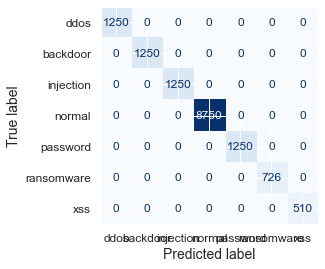

In [74]:
# Matrix de Confusão (Apenas do teste)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=labels, 
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()